## 아주쉬운 유전체 분석 - 실습편(2019)

    작성일자 : 2020/05/16
    작성자 : 조예슬

    강의 : 제 7강
           Bioconductor (아주대 지별아) - 1. Introduction to Bioconductor
           
           제 8강
           Bioconductor (아주대 지별아) - 2. ExpressionSet
           
           제 9강
           Bioconductor (아주대 지별아) - 3. Granges
           
           제 10강
           Bioconductor (아주대 지별아) - 4. Preprocessing

#### Bioconductor
    : 가지고 있는 genomic data를 가지고서 어떻게 이해하고 어떻게 분석할것인지에대한 tool 제공
    : R을 기본으로함
    : open source이므로 거의 분석 가능

#### Bioconductor를 이용하여 배울것
    - ExpressionSet
    - GRanges
    - Preprocessing

#### ExpressionSet
     : created in the first place, and creation can be complicated
     : assayData, metaData, annotation 세개의 데이터가 하나로 있는 것을 ExpressionSet이라함
     
    - assayData 
     : used to hint at the methods used to access different data components
     
    - metaData 
     : describing samples in the experiment(phenoData)
      샘플에 대한 phenoData
      
    - annotationData
     : related to the protocol used for processing each sample(protocolData), and a flexible structure to describe the experiment(experimentData)
     :내가 가지고있는 데이터의 심볼, probe단위 내의 annotationData를 feature로함

#### ExpressionSet 어떻게 만들수있는가
    Genomics data
    : RNA-seq, small-RNA seq, WES, WGS, methylation, chip-seq, Array
        - Expression profile
        - Mutation profile
        - Methylation profile
        - Copy number variation profile
    : 이런 데이터를 분석하기 위해선 ExpressionSet을 만들어 진행하면 분석이 용이함
    
    : 데이터가 나오게 되면 데이터 자체를 가지고 matrix형태로 구조화 할 수 있음
      Row(행) : 데이터 종류에 따라 기준이 되는 features
      Column(열) : samples
      value(값) : 측정값(expression level, methylation level)
      
    : 데이터 분석을 위한 각 features 및 samples들의 정보들이 필요함
        - feature 정보 : gene name, chromosome location
        - sample 정보(phenotype) : sample ID, gender, age, survival, condition, drug treatment
        
    이러한 구조의 데이터를 효율적으로 관리 가능한 R 데이터 타입 -> ExpressionSet
    
#### ExpressionSet class
    1) 실험(array, sequencing)의 data값(assayData)
        row : sample
        column : Features(Gene name, CpG probes)
        value : Expression values
    2) 자료(sample)를 설명하는 metadata(phenoData)
        row : Covariates(age, gender, tumor stage..)
        column : samples
    3) 자료(gene)의 annotation에 대한 설명(featureData)
        row : Covariates(chromosome chr, start, end..)
        column : Features(Gene name, CpG probes)
        
    *주의*
    - assayData의 rowname은 featureData의 rowname과 같아야함
    - assayData의 colname은 phenoData의 rowname과 같아야함
    - feature/phenoData의 rowname은 중복을 가지면 안됨
    
#### ExpressionSet 데이터 추출에 사용되는 함수들
    - exprs() : assayData 추출
    - fData() : featureData 추출
    - pData() : phenoData 추출
    - sampleNames()
    - featureNames()
    - varLabels()
    - fvarLabels()

### ExpressionSet

#### 데이터 준비

In [2]:
# library(Biobase)

# working directory 잡기
getwd()

[1] "C:/Users/cho ye seul/Documents/예슬/공부/KGOL/아주쉬운유전체분석-실습(2019)"

In [23]:
# read file
# read.delim : 데이터가 탭으로 구분되어있을 시에 사용하여 데이터를 가져온다
exp = read.delim("C:/Users/cho ye seul/Documents/예슬/공부/KGOL/아주쉬운유전체분석-실습(2019)/week4/files/expression.txt")
fdata = read.delim("C:/Users/cho ye seul/Documents/예슬/공부/KGOL/아주쉬운유전체분석-실습(2019)/week4/files/feature_info.txt")
pdata = read.delim("C:/Users/cho ye seul/Documents/예슬/공부/KGOL/아주쉬운유전체분석-실습(2019)/week4/files/clinical_info.txt")

#### expression data(assay data)

In [24]:
# expression
head(exp) # 상위 6개 보여주기 # probe ID methylation 자료이므로 cg로 사용됨
dim(exp) # 데이터 구성 형태 27574개의 데이터 103개 샘플
colnames(exp) # 열 이름 GSM으로 넘버링 부여됨

ID,GSM1094712,GSM1094713,GSM1094714,GSM1094715,GSM1094716,GSM1094717,GSM1094718,GSM1094719,GSM1094720,...,GSM1094804,GSM1094805,GSM1094806,GSM1094807,GSM1094808,GSM1094809,GSM1094810,GSM1094811,GSM1094812,GSM1094813
cg00000292,0.64309910,0.74282860,0.63144460,0.65827340,0.56919170,0.47391130,0.69836750,0.51502620,0.63496350,...,0.56189240,0.48260210,0.47314580,0.45261240,0.5970588,0.80917980,0.62922120,0.71959860,0.46890760,0.79923030
cg00002426,0.32868760,0.75132100,0.44941860,0.60592190,0.41546200,0.38001490,0.17818040,0.28844970,0.54983280,...,0.29045360,0.27961060,0.32519360,0.31030150,0.2248062,0.33807030,0.33921930,0.11382980,0.25965490,0.56007950
cg00003994,0.14259820,0.08799821,0.17654420,0.12513140,0.19333590,0.16632020,0.12637510,0.10817940,0.14776020,...,0.13346040,0.16650300,0.11022120,0.16445350,0.1126280,0.05320665,0.16304350,0.16031460,0.08785529,0.07280514
cg00005847,0.25091580,0.22412290,0.24311180,0.21268970,0.31705690,0.45528060,0.17944010,0.32322450,0.26348170,...,0.26777180,0.30460450,0.24793630,0.26414190,0.3059177,0.52253520,0.26847660,0.62583590,0.30578190,0.72841440
cg00006414,0.07263885,0.09259510,0.15388150,0.13026920,0.24343860,0.15554940,0.12675760,0.08776407,0.12273520,...,0.11113090,0.13248870,0.10749120,0.15981910,0.1070326,0.11596260,0.19695470,0.14000000,0.17531220,0.09686562
cg00007981,0.02842795,0.03981937,0.05854679,0.04638731,0.05710354,0.05260659,0.04571679,0.04601138,0.04819478,...,0.05519897,0.04525367,0.07017953,0.08654512,0.0754717,0.07757167,0.08561236,0.08121658,0.09143440,0.05793808


[1] 27574   103

[1] "ID"         "GSM1094712" "GSM1094713" "GSM1094714" "GSM1094715"
  [6] "GSM1094716" "GSM1094717" "GSM1094718" "GSM1094719" "GSM1094720"
 [11] "GSM1094721" "GSM1094722" "GSM1094723" "GSM1094724" "GSM1094725"
 [16] "GSM1094726" "GSM1094727" "GSM1094728" "GSM1094729" "GSM1094730"
 [21] "GSM1094731" "GSM1094732" "GSM1094733" "GSM1094734" "GSM1094735"
 [26] "GSM1094736" "GSM1094737" "GSM1094738" "GSM1094739" "GSM1094740"
 [31] "GSM1094741" "GSM1094742" "GSM1094743" "GSM1094744" "GSM1094745"
 [36] "GSM1094746" "GSM1094747" "GSM1094748" "GSM1094749" "GSM1094750"
 [41] "GSM1094751" "GSM1094752" "GSM1094753" "GSM1094754" "GSM1094755"
 [46] "GSM1094756" "GSM1094757" "GSM1094758" "GSM1094759" "GSM1094760"
 [51] "GSM1094761" "GSM1094762" "GSM1094763" "GSM1094764" "GSM1094765"
 [56] "GSM1094766" "GSM1094767" "GSM1094768" "GSM1094769" "GSM1094770"
 [61] "GSM1094771" "GSM1094772" "GSM1094773" "GSM1094774" "GSM1094775"
 [66] "GSM1094776" "GSM1094777" "GSM1094778" "GSM1094779" "GSM1094780"
 [71] "GSM1094781" "GSM1094782" "GSM1094783" "GSM1094784" "GSM1094785"
 [76] "GSM1094786" "GSM1094787" "GSM1094788" "GSM1094789" "GSM1094790"
 [81] "GSM1094791" "GSM1094792" "GSM1094793" "GSM1094794" "GSM1094795"
 [86] "GSM1094796" "GSM1094797" "GSM1094798" "GSM1094799" "GSM1094800"
 [91] "GSM1094801" "GSM1094802" "GSM1094803" "GSM1094804" "GSM1094805"
 [96] "GSM1094806" "GSM1094807" "GSM1094808" "GSM1094809" "GSM1094810"
[101] "GSM1094811" "GSM1094812" "GSM1094813"

In [25]:
# ID를 id라는 object에 저장
id = exp$ID
# ID를 제외한 나머지 데이터를 exp에 저장
exp = exp[, -1]
# 다시 데이터 형태 확인해서 id가 빠졌는지 확인(103->102)
dim(exp)
head(exp)

[1] 27574   102

GSM1094712,GSM1094713,GSM1094714,GSM1094715,GSM1094716,GSM1094717,GSM1094718,GSM1094719,GSM1094720,GSM1094721,...,GSM1094804,GSM1094805,GSM1094806,GSM1094807,GSM1094808,GSM1094809,GSM1094810,GSM1094811,GSM1094812,GSM1094813
0.64309910,0.74282860,0.63144460,0.65827340,0.56919170,0.47391130,0.69836750,0.51502620,0.63496350,0.64935590,...,0.56189240,0.48260210,0.47314580,0.45261240,0.5970588,0.80917980,0.62922120,0.71959860,0.46890760,0.79923030
0.32868760,0.75132100,0.44941860,0.60592190,0.41546200,0.38001490,0.17818040,0.28844970,0.54983280,0.52469130,...,0.29045360,0.27961060,0.32519360,0.31030150,0.2248062,0.33807030,0.33921930,0.11382980,0.25965490,0.56007950
0.14259820,0.08799821,0.17654420,0.12513140,0.19333590,0.16632020,0.12637510,0.10817940,0.14776020,0.17925430,...,0.13346040,0.16650300,0.11022120,0.16445350,0.1126280,0.05320665,0.16304350,0.16031460,0.08785529,0.07280514
0.25091580,0.22412290,0.24311180,0.21268970,0.31705690,0.45528060,0.17944010,0.32322450,0.26348170,0.30742830,...,0.26777180,0.30460450,0.24793630,0.26414190,0.3059177,0.52253520,0.26847660,0.62583590,0.30578190,0.72841440
0.07263885,0.09259510,0.15388150,0.13026920,0.24343860,0.15554940,0.12675760,0.08776407,0.12273520,0.09943914,...,0.11113090,0.13248870,0.10749120,0.15981910,0.1070326,0.11596260,0.19695470,0.14000000,0.17531220,0.09686562
0.02842795,0.03981937,0.05854679,0.04638731,0.05710354,0.05260659,0.04571679,0.04601138,0.04819478,0.05466390,...,0.05519897,0.04525367,0.07017953,0.08654512,0.0754717,0.07757167,0.08561236,0.08121658,0.09143440,0.05793808


In [26]:
# expressionSet을 만들때 rownames에 id를 넣기
rownames(exp)=id
head(exp)

,GSM1094712,GSM1094713,GSM1094714,GSM1094715,GSM1094716,GSM1094717,GSM1094718,GSM1094719,GSM1094720,GSM1094721,...,GSM1094804,GSM1094805,GSM1094806,GSM1094807,GSM1094808,GSM1094809,GSM1094810,GSM1094811,GSM1094812,GSM1094813
cg00000292,0.64309910,0.74282860,0.63144460,0.65827340,0.56919170,0.47391130,0.69836750,0.51502620,0.63496350,0.64935590,...,0.56189240,0.48260210,0.47314580,0.45261240,0.5970588,0.80917980,0.62922120,0.71959860,0.46890760,0.79923030
cg00002426,0.32868760,0.75132100,0.44941860,0.60592190,0.41546200,0.38001490,0.17818040,0.28844970,0.54983280,0.52469130,...,0.29045360,0.27961060,0.32519360,0.31030150,0.2248062,0.33807030,0.33921930,0.11382980,0.25965490,0.56007950
cg00003994,0.14259820,0.08799821,0.17654420,0.12513140,0.19333590,0.16632020,0.12637510,0.10817940,0.14776020,0.17925430,...,0.13346040,0.16650300,0.11022120,0.16445350,0.1126280,0.05320665,0.16304350,0.16031460,0.08785529,0.07280514
cg00005847,0.25091580,0.22412290,0.24311180,0.21268970,0.31705690,0.45528060,0.17944010,0.32322450,0.26348170,0.30742830,...,0.26777180,0.30460450,0.24793630,0.26414190,0.3059177,0.52253520,0.26847660,0.62583590,0.30578190,0.72841440
cg00006414,0.07263885,0.09259510,0.15388150,0.13026920,0.24343860,0.15554940,0.12675760,0.08776407,0.12273520,0.09943914,...,0.11113090,0.13248870,0.10749120,0.15981910,0.1070326,0.11596260,0.19695470,0.14000000,0.17531220,0.09686562
cg00007981,0.02842795,0.03981937,0.05854679,0.04638731,0.05710354,0.05260659,0.04571679,0.04601138,0.04819478,0.05466390,...,0.05519897,0.04525367,0.07017953,0.08654512,0.0754717,0.07757167,0.08561236,0.08121658,0.09143440,0.05793808


#### phenotype data

In [27]:
head(pdata) 
# assaydata(expressiondata)의 colname에 해당하는게 geo_accession에 들어가있음
# sample_type liver cancer, cell line, hcc 가 포함되어져 있는 phenotype

sample_id,geo_accession,sample_type
NY102,GSM1094810,Healthy liver
Hep3B,GSM1094811,cell line
HepG2,GSM1094812,cell line
Huh7,GSM1094813,cell line
B45,GSM1094712,Healthy liver
B66,GSM1094713,hepatocellular carcinoma


In [28]:
# assaydata의 column하고 phenotypedata의 rowname하고 같아야함! match함수를 사용
# match를 통해서 assaydata와 pdata의 정렬을 동일하게 만들어줌
pdat = pdata[match(colnames(exp), pdata$geo_accession),]
head(pdat)

rownames(pdat) = colnames(exp)
head(pdat)

phenoData = new("AnnotatedDataFrame", data=pdat)
phenoData

,sample_id,geo_accession,sample_type
5,B45,GSM1094712,Healthy liver
6,B66,GSM1094713,hepatocellular carcinoma
7,B73,GSM1094714,Cirrhosis
8,B74,GSM1094715,hepatocellular carcinoma
9,B97,GSM1094716,Cirrhosis
10,B98,GSM1094717,hepatocellular carcinoma


,sample_id,geo_accession,sample_type
GSM1094712,B45,GSM1094712,Healthy liver
GSM1094713,B66,GSM1094713,hepatocellular carcinoma
GSM1094714,B73,GSM1094714,Cirrhosis
GSM1094715,B74,GSM1094715,hepatocellular carcinoma
GSM1094716,B97,GSM1094716,Cirrhosis
GSM1094717,B98,GSM1094717,hepatocellular carcinoma


An object of class 'AnnotatedDataFrame'
  rowNames: GSM1094712 GSM1094713 ... GSM1094813 (102 total)
  varLabels: sample_id geo_accession sample_type
  varMetadata: labelDescription

#### feature data

In [29]:
head(fdata)
# ID : methlylation id, GenomeBuild : id의 GenomeBuild, Chr : Chromosome, Start, End : 위치, Symbol : probe의 위치

ID,GenomeBuild,Chr,Start,End,Strand,Symbol
cg00044245,37,chr6,94128889,94128890,-,EPHA7
cg00044729,37,chr22,40290976,40290977,-,FLJ25421
cg00047050,37,chr11,107879431,107879432,+,CUL5
cg00047469,37,chr9,116172568,116172569,+,C9orf43
cg00049986,37,chr14,35591414,35591415,-,C14orf10
cg00050312,37,chr17,64299065,64299066,+,PRKCA


In [30]:
# feature data의 rowname과 assaydata의 rowname이 같아야함
# 정렬 맞춰주기
fdat = fdata[match(rownames(exp), fdata$ID),]
head(fdat)

# rowname 삽입
rownames(fdat) = rownames(exp)
head(fdat)

featureData = new("AnnotatedDataFrame", data=fdat)
head(featureData)

,ID,GenomeBuild,Chr,Start,End,Strand,Symbol
27526,cg00000292,37,chr16,28890100,28890101,+,ATP2A1
27527,cg00002426,37,chr3,57743543,57743544,+,SLMAP
27528,cg00003994,37,chr7,15725862,15725863,-,MEOX2
27529,cg00005847,37,chr2,177029073,177029074,+,HOXD3
27530,cg00006414,37,chr7,148822837,148822838,+,ZNF398
27531,cg00007981,37,chr11,93862594,93862595,+,PANX1


,ID,GenomeBuild,Chr,Start,End,Strand,Symbol
cg00000292,cg00000292,37,chr16,28890100,28890101,+,ATP2A1
cg00002426,cg00002426,37,chr3,57743543,57743544,+,SLMAP
cg00003994,cg00003994,37,chr7,15725862,15725863,-,MEOX2
cg00005847,cg00005847,37,chr2,177029073,177029074,+,HOXD3
cg00006414,cg00006414,37,chr7,148822837,148822838,+,ZNF398
cg00007981,cg00007981,37,chr11,93862594,93862595,+,PANX1


An object of class 'AnnotatedDataFrame'
  rowNames: cg00000292 cg00002426 ... cg00007981 (6 total)
  varLabels: ID GenomeBuild ... Symbol (7 total)
  varMetadata: labelDescription

#### ExpressionSet

In [31]:
# 확인 : 정렬 숫자 맞는지 확인 필수 맞아야지 set이 만들어짐
dim(exp)
dim(pdat)
dim(fdat)

[1] 27574   102

[1] 102   3

[1] 27574     7

In [32]:
# ExpressionSet 만들기
# new() : set 만드는 function
# 어떠한 데이터 구조로 이뤄져있는지 알아야함
exampleSet = new("ExpressionSet", exprs = exp, phenoData = phenoData, featureData = featureData)

# 그냥 이름 바꾸기
mset = exampleSet

In [55]:
# 데이터 저장
# save(mset, file="C:/Users/cho ye seul/Documents/예슬/공부/KGOL/아주쉬운유전체분석-실습(2019)/week4/mset.rda")

In [45]:
# 저장한 ExpressionSet 불러오기
load("C:/Users/cho ye seul/Documents/예슬/공부/KGOL/아주쉬운유전체분석-실습(2019)/week4/mset.rda")
mset

ExpressionSet (storageMode: lockedEnvironment)
assayData: 27574 features, 102 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: GSM1094712 GSM1094713 ... GSM1094813 (102 total)
  varLabels: sample_id geo_accession sample_type
  varMetadata: labelDescription
featureData
  featureNames: cg00000292 cg00002426 ... cg27665659 (27574 total)
  fvarLabels: ID GenomeBuild ... Symbol (7 total)
  fvarMetadata: labelDescription
experimentData: use 'experimentData(object)'
Annotation:  

In [46]:
# 보고자하는 데이터 불러오기
# exprs
head(exprs(mset))

# pData
head(pData(mset))

#fData
head(fData(mset))

,GSM1094712,GSM1094713,GSM1094714,GSM1094715,GSM1094716,GSM1094717,GSM1094718,GSM1094719,GSM1094720,GSM1094721,...,GSM1094804,GSM1094805,GSM1094806,GSM1094807,GSM1094808,GSM1094809,GSM1094810,GSM1094811,GSM1094812,GSM1094813
cg00000292,0.64309910,0.74282860,0.63144460,0.65827340,0.56919170,0.47391130,0.69836750,0.51502620,0.63496350,0.64935590,...,0.56189240,0.48260210,0.47314580,0.45261240,0.5970588,0.80917980,0.62922120,0.71959860,0.46890760,0.79923030
cg00002426,0.32868760,0.75132100,0.44941860,0.60592190,0.41546200,0.38001490,0.17818040,0.28844970,0.54983280,0.52469130,...,0.29045360,0.27961060,0.32519360,0.31030150,0.2248062,0.33807030,0.33921930,0.11382980,0.25965490,0.56007950
cg00003994,0.14259820,0.08799821,0.17654420,0.12513140,0.19333590,0.16632020,0.12637510,0.10817940,0.14776020,0.17925430,...,0.13346040,0.16650300,0.11022120,0.16445350,0.1126280,0.05320665,0.16304350,0.16031460,0.08785529,0.07280514
cg00005847,0.25091580,0.22412290,0.24311180,0.21268970,0.31705690,0.45528060,0.17944010,0.32322450,0.26348170,0.30742830,...,0.26777180,0.30460450,0.24793630,0.26414190,0.3059177,0.52253520,0.26847660,0.62583590,0.30578190,0.72841440
cg00006414,0.07263885,0.09259510,0.15388150,0.13026920,0.24343860,0.15554940,0.12675760,0.08776407,0.12273520,0.09943914,...,0.11113090,0.13248870,0.10749120,0.15981910,0.1070326,0.11596260,0.19695470,0.14000000,0.17531220,0.09686562
cg00007981,0.02842795,0.03981937,0.05854679,0.04638731,0.05710354,0.05260659,0.04571679,0.04601138,0.04819478,0.05466390,...,0.05519897,0.04525367,0.07017953,0.08654512,0.0754717,0.07757167,0.08561236,0.08121658,0.09143440,0.05793808


,sample_id,geo_accession,sample_type
GSM1094712,B45,GSM1094712,Healthy liver
GSM1094713,B66,GSM1094713,hepatocellular carcinoma
GSM1094714,B73,GSM1094714,Cirrhosis
GSM1094715,B74,GSM1094715,hepatocellular carcinoma
GSM1094716,B97,GSM1094716,Cirrhosis
GSM1094717,B98,GSM1094717,hepatocellular carcinoma


,ID,GenomeBuild,Chr,Start,End,Strand,Symbol
cg00000292,cg00000292,37,chr16,28890100,28890101,+,ATP2A1
cg00002426,cg00002426,37,chr3,57743543,57743544,+,SLMAP
cg00003994,cg00003994,37,chr7,15725862,15725863,-,MEOX2
cg00005847,cg00005847,37,chr2,177029073,177029074,+,HOXD3
cg00006414,cg00006414,37,chr7,148822837,148822838,+,ZNF398
cg00007981,cg00007981,37,chr11,93862594,93862595,+,PANX1


[1] "GSM1094712" "GSM1094713" "GSM1094714" "GSM1094715" "GSM1094716"
  [6] "GSM1094717" "GSM1094718" "GSM1094719" "GSM1094720" "GSM1094721"
 [11] "GSM1094722" "GSM1094723" "GSM1094724" "GSM1094725" "GSM1094726"
 [16] "GSM1094727" "GSM1094728" "GSM1094729" "GSM1094730" "GSM1094731"
 [21] "GSM1094732" "GSM1094733" "GSM1094734" "GSM1094735" "GSM1094736"
 [26] "GSM1094737" "GSM1094738" "GSM1094739" "GSM1094740" "GSM1094741"
 [31] "GSM1094742" "GSM1094743" "GSM1094744" "GSM1094745" "GSM1094746"
 [36] "GSM1094747" "GSM1094748" "GSM1094749" "GSM1094750" "GSM1094751"
 [41] "GSM1094752" "GSM1094753" "GSM1094754" "GSM1094755" "GSM1094756"
 [46] "GSM1094757" "GSM1094758" "GSM1094759" "GSM1094760" "GSM1094761"
 [51] "GSM1094762" "GSM1094763" "GSM1094764" "GSM1094765" "GSM1094766"
 [56] "GSM1094767" "GSM1094768" "GSM1094769" "GSM1094770" "GSM1094771"
 [61] "GSM1094772" "GSM1094773" "GSM1094774" "GSM1094775" "GSM1094776"
 [66] "GSM1094777" "GSM1094778" "GSM1094779" "GSM1094780" "GSM1094781"
 [71] "GSM1094782" "GSM1094783" "GSM1094784" "GSM1094785" "GSM1094786"
 [76] "GSM1094787" "GSM1094788" "GSM1094789" "GSM1094790" "GSM1094791"
 [81] "GSM1094792" "GSM1094793" "GSM1094794" "GSM1094795" "GSM1094796"
 [86] "GSM1094797" "GSM1094798" "GSM1094799" "GSM1094800" "GSM1094801"
 [91] "GSM1094802" "GSM1094803" "GSM1094804" "GSM1094805" "GSM1094806"
 [96] "GSM1094807" "GSM1094808" "GSM1094809" "GSM1094810" "GSM1094811"
[101] "GSM1094812" "GSM1094813"

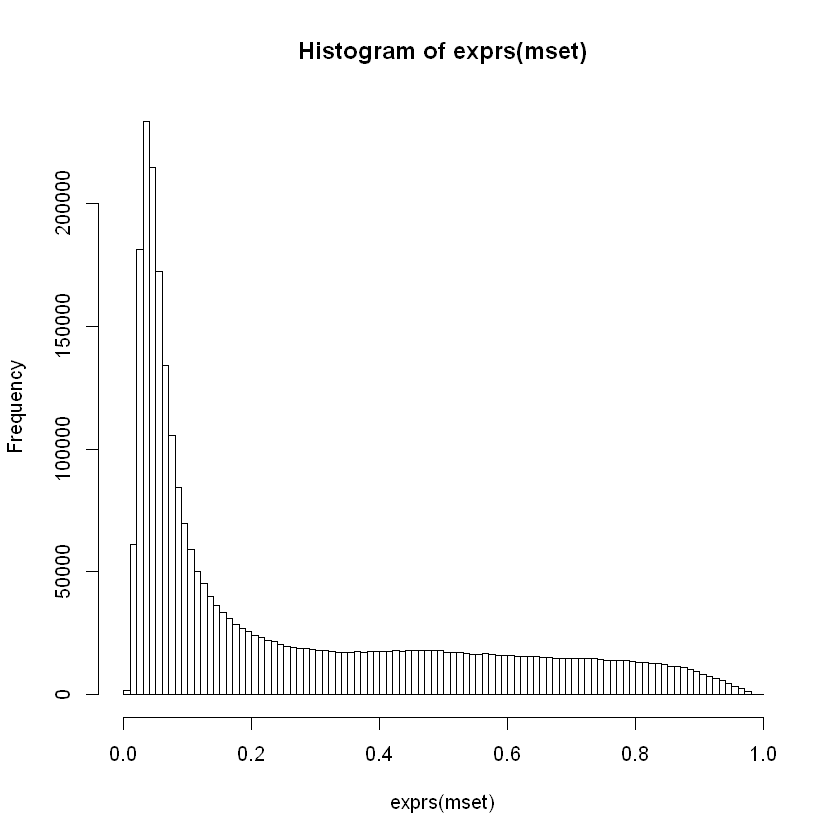

In [35]:
# 데이터 형태 보기
# sample이름 한번에 보기
sampleNames(mset)

# 데이터 구성 histogram으로 보기
# hist(exprs(mset), breaks=100)

# hist로 볼때 x는 숫자여야함 # 2 : col 기준
exprs(mset) = apply(exprs(mset), 2, as.numeric)
hist(exprs(mset), breaks=100)
# data는 methlylation값이므로 array는 0-1사이
# 분포 결과를 보면 0.0에서 0.2사이에 많이 분포하고 있음을 알 수 있다

In [36]:
# varLabels : phenotypeData에서 sample id, sample type 등에 해당
varLabels(mset)

# fvarLabels : fData에서 볼 수 있는 것
fvarLabels(mset)

[1] "sample_id"     "geo_accession" "sample_type"

[1] "ID"          "GenomeBuild" "Chr"         "Start"       "End"        
[6] "Strand"      "Symbol"

In [37]:
# change sample name
sampleNames(mset) = pData(mset)$sample_id
sampleNames(mset)
# sample name 바꾸게 되면 phenotype Data도 같이 바뀌게 됨
head(pData(mset))

[1] "B45"   "B66"   "B73"   "B74"   "B97"   "B98"   "M102"  "M11"   "M12"  
 [10] "M35"   "M67"   "M69"   "M79"   "M80"   "NY103" "NY104" "NY106" "NY107"
 [19] "NY108" "NY223" "NY224" "NY310" "NY311" "NY325" "NY326" "NY327" "NY328"
 [28] "NY329" "NY39"  "NY65"  "NY82"  "NY96"  "NY99"  "B13"   "B17"   "B19"  
 [37] "B25"   "B29"   "B31"   "B33"   "B35"   "B68"   "B70"   "B72"   "B76"  
 [46] "B78"   "B80"   "B82"   "B84"   "B86"   "B88"   "B90"   "B94"   "B96"  
 [55] "M104"  "M106"  "M15"   "M17"   "M53"   "M81"   "M88"   "M90"   "M92"  
 [64] "M94"   "M96"   "M98"   "NY18"  "NY204" "NY206" "NY208" "NY218" "NY222"
 [73] "NY226" "NY228" "NY232" "NY307" "NY309" "NY313" "NY317" "NY319" "NY321"
 [82] "NY323" "NY331" "NY34"  "NY36"  "NY17"  "NY37"  "B92"   "NY29"  "NY55" 
 [91] "NY58"  "NY61"  "NY10"  "NY24"  "NY49"  "NY56"  "NY57"  "NY101" "NY102"
[100] "Hep3B" "HepG2" "Huh7"

,sample_id,geo_accession,sample_type
B45,B45,GSM1094712,Healthy liver
B66,B66,GSM1094713,hepatocellular carcinoma
B73,B73,GSM1094714,Cirrhosis
B74,B74,GSM1094715,hepatocellular carcinoma
B97,B97,GSM1094716,Cirrhosis
B98,B98,GSM1094717,hepatocellular carcinoma


In [38]:
# 데이터 해당 개수 보기
table(pData(mset)$sample_type)

# filtering : which() : 해당하는 데이터만 뽑아서 볼 수 있음
# cell line만 뽑아서 보기
st1 = sampleNames(mset)[which(pData(mset)$sample_type=="cell line")]
st1
# cell line이 아닌것 뽑아서 보기
st = sampleNames(mset)[-which(pData(mset)$sample_type=="cell line")]
st
# grep() : 대소문자 구분하여 검색
st3 = sampleNames(mset)[grep("cell line|Cirrhosis", pData(mset)$sample_type)]
st3


                   cell line                    Cirrhosis 
                           3                           10 
               Healthy liver     hepatocellular carcinoma 
                           8                           71 
high-grade dysplastic nodule  low-grade dysplastic nodule 
                           5                            5 

[1] "Hep3B" "HepG2" "Huh7"

[1] "B45"   "B66"   "B73"   "B74"   "B97"   "B98"   "M102"  "M11"   "M12"  
[10] "M35"   "M67"   "M69"   "M79"   "M80"   "NY103" "NY104" "NY106" "NY107"
[19] "NY108" "NY223" "NY224" "NY310" "NY311" "NY325" "NY326" "NY327" "NY328"
[28] "NY329" "NY39"  "NY65"  "NY82"  "NY96"  "NY99"  "B13"   "B17"   "B19"  
[37] "B25"   "B29"   "B31"   "B33"   "B35"   "B68"   "B70"   "B72"   "B76"  
[46] "B78"   "B80"   "B82"   "B84"   "B86"   "B88"   "B90"   "B94"   "B96"  
[55] "M104"  "M106"  "M15"   "M17"   "M53"   "M81"   "M88"   "M90"   "M92"  
[64] "M94"   "M96"   "M98"   "NY18"  "NY204" "NY206" "NY208" "NY218" "NY222"
[73] "NY226" "NY228" "NY232" "NY307" "NY309" "NY313" "NY317" "NY319" "NY321"
[82] "NY323" "NY331" "NY34"  "NY36"  "NY17"  "NY37"  "B92"   "NY29"  "NY55" 
[91] "NY58"  "NY61"  "NY10"  "NY24"  "NY49"  "NY56"  "NY57"  "NY101" "NY102"

[1] "B73"   "B97"   "M12"   "M80"   "NY223" "NY310" "NY326" "NY328" "NY17" 
[10] "NY37"  "Hep3B" "HepG2" "Huh7"

In [39]:
# cell line 샘플 뺀것만 fil.mset에 넣기 / 99개의 sampples이 생성된 것을 볼 수 있음
fil.mset=mset[,st]
fil.mset

ExpressionSet (storageMode: lockedEnvironment)
assayData: 27574 features, 99 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: B45 B66 ... NY102 (99 total)
  varLabels: sample_id geo_accession sample_type
  varMetadata: labelDescription
featureData
  featureNames: cg00000292 cg00002426 ... cg27665659 (27574 total)
  fvarLabels: ID GenomeBuild ... Symbol (7 total)
  fvarMetadata: labelDescription
experimentData: use 'experimentData(object)'
Annotation:  

### Granges

    The GRanges class is a container for the genomic locations and their associated annotations
    
    GRanges is a vector of genomic locations and associated annotations.
    Each element in the vector is comprised of a sequence name, an interval, a strand, and optional metadata coluns (e.g. score, GC content, etc.).
    This information is stored in four components
    
    * Why do we use it?
    : data는 있고 알고싶은 특정한 영역들에 methylation data가 어떤 형태를 띄고 있는지, 어느 위치에 붙어있는지, marker site와 내 데이터를 어떻게 연관시켜서 분석할지
    
    : For example
    - transcription factor binding sites
    - transposon sites
    - transcript regions, including exons, introns, etc.
    - SNPs and structural variations
    - CpG island sites
    - histone modification marker sites

In [1]:
library(GenomicRanges)
library(GenomicFeatures)

Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: 'BiocGenerics'

The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs

The following objects are masked from 'package:base':

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min

Loading required package: S4Vectors
Warning message:
"package 'S4Vectors' was bui

#### IRanges
    Granges를 만들기위해선 IRanges(Interver Ranges)를 사용

In [40]:
# IRanges에 start와 end position 넣어주기 
r = IRanges(start=c(1, 3, 12, 10), end=c(4, 5, 25, 19))
r # 자동적으로 width 값이 나온다

# IRanges에 end 대신 width를 넣어도 end 값이 자동적으로 나오게 됨
r = IRanges(start=c(1, 3, 12, 10), width=c(4, 3, 14, 10))
r

# 형태파악하기
length(r)
start(r)
end(r)
width(r)
r[1:2]

IRanges object with 4 ranges and 0 metadata columns:
          start       end     width
      <integer> <integer> <integer>
  [1]         1         4         4
  [2]         3         5         3
  [3]        12        25        14
  [4]        10        19        10

IRanges object with 4 ranges and 0 metadata columns:
          start       end     width
      <integer> <integer> <integer>
  [1]         1         4         4
  [2]         3         5         3
  [3]        12        25        14
  [4]        10        19        10

[1] 4

[1]  1  3 12 10

[1]  4  5 25 19

[1]  4  3 14 10

IRanges object with 2 ranges and 0 metadata columns:
          start       end     width
      <integer> <integer> <integer>
  [1]         1         4         4
  [2]         3         5         3

In [41]:
## IRanges와 많이 사용하는 함수 : reduce(), disjoin(), coverage()
# reduce() : 4개의 sample의 합집합값이라 보면됨. start와 end부분이 겹치는 애들은 하나로 묶어서 나타냄
#            예를 들어, [1]의 start는 1, end는 4, [2]의 start는 3, end는 5일때, reduce하면 start는 1, end는 5인 새로운 값 생성
# disjoin() : 겹치는 부분 따로, 겹치지 않는 부분 따로 갖게됨. 알아서 쪼갬
#             [1]과 [2]의 경우, 1-3, 3-4, 4-5 부분으로 나뉘게 됨
# coverage() : 겹치지 않는 부분은 1, 겹치는 부분은 2, 둘다 없는 경우는 0으로 계산
#              1-3은 1, 3-4는 2, 4-5는 1, 5-10은 0
reduce(r)
disjoin(r)
coverage(r)

IRanges object with 2 ranges and 0 metadata columns:
          start       end     width
      <integer> <integer> <integer>
  [1]         1         5         5
  [2]        10        25        16

IRanges object with 6 ranges and 0 metadata columns:
          start       end     width
      <integer> <integer> <integer>
  [1]         1         2         2
  [2]         3         4         2
  [3]         5         5         1
  [4]        10        11         2
  [5]        12        19         8
  [6]        20        25         6

integer-Rle of length 25 with 7 runs
  Lengths: 2 2 1 4 2 8 6
  Values : 1 2 1 0 1 2 1

In [42]:
# Granges : IRanges를 기본으로해서 chromosome의 seqnames이 들어가게 되는것
gr1 = GRanges(seqnames = Rle("chr1", 2), ranges = IRanges(start = c(1, 10), end = c(5, 15)))
gr1
gr2 = GRanges(seqnames = Rle("chr1", 1), ranges = IRanges(start = 3, end = 12))
gr2

GRanges object with 2 ranges and 0 metadata columns:
      seqnames    ranges strand
         <Rle> <IRanges>  <Rle>
  [1]     chr1       1-5      *
  [2]     chr1     10-15      *
  -------
  seqinfo: 1 sequence from an unspecified genome; no seqlengths

GRanges object with 1 range and 0 metadata columns:
      seqnames    ranges strand
         <Rle> <IRanges>  <Rle>
  [1]     chr1      3-12      *
  -------
  seqinfo: 1 sequence from an unspecified genome; no seqlengths

In [43]:
## Granges와 많이 사용하는 함수 : union(), intersect(), setdiff(), countOverlaps(), findOverlaps()
# union() : reduce()와 같은 기능, gr1과 gr2를 다 포함하는 영역
# intersect() : 겹치는 부분 도출됨
# setdiff() : 겹치지 않는 부분
# countOverlaps() : gr1과 gr2 겹치는 부분 카운트하기
# findOverlaps() : queryHis : 넣어준 쿼리가 뭐니 gr1은 2개.....? what?
union(gr1, gr2)
intersect(gr1, gr2)
setdiff(gr1, gr2)
countOverlaps(gr1, gr2)
findOverlaps(gr1, gr2)

GRanges object with 1 range and 0 metadata columns:
      seqnames    ranges strand
         <Rle> <IRanges>  <Rle>
  [1]     chr1      1-15      *
  -------
  seqinfo: 1 sequence from an unspecified genome; no seqlengths

GRanges object with 2 ranges and 0 metadata columns:
      seqnames    ranges strand
         <Rle> <IRanges>  <Rle>
  [1]     chr1       3-5      *
  [2]     chr1     10-12      *
  -------
  seqinfo: 1 sequence from an unspecified genome; no seqlengths

GRanges object with 2 ranges and 0 metadata columns:
      seqnames    ranges strand
         <Rle> <IRanges>  <Rle>
  [1]     chr1       1-2      *
  [2]     chr1     13-15      *
  -------
  seqinfo: 1 sequence from an unspecified genome; no seqlengths

[1] 1 1

Hits object with 2 hits and 0 metadata columns:
      queryHits subjectHits
      <integer>   <integer>
  [1]         1           1
  [2]         2           1
  -------
  queryLength: 2 / subjectLength: 1

In [48]:
## query index
# subject index
# mset data는 chromosome하고 start, end data가 둘다 있기에 GRanges 사용 가능
data(mset)
head(fData(mset))
m.gr = GRanges(seqnames = fData(mset)$Chr, IRanges(start = fData(mset)$Start, end = fData(mset)$End),
              strand = NULL, data_id = fData(mset)$ID)
m.gr

Warning message in data(mset):
"data set 'mset' not found"

,ID,GenomeBuild,Chr,Start,End,Strand,Symbol
cg00000292,cg00000292,37,chr16,28890100,28890101,+,ATP2A1
cg00002426,cg00002426,37,chr3,57743543,57743544,+,SLMAP
cg00003994,cg00003994,37,chr7,15725862,15725863,-,MEOX2
cg00005847,cg00005847,37,chr2,177029073,177029074,+,HOXD3
cg00006414,cg00006414,37,chr7,148822837,148822838,+,ZNF398
cg00007981,cg00007981,37,chr11,93862594,93862595,+,PANX1


GRanges object with 27574 ranges and 1 metadata column:
          seqnames              ranges strand |    data_id
             <Rle>           <IRanges>  <Rle> |   <factor>
      [1]    chr16   28890100-28890101      * | cg00000292
      [2]     chr3   57743543-57743544      * | cg00002426
      [3]     chr7   15725862-15725863      * | cg00003994
      [4]     chr2 177029073-177029074      * | cg00005847
      [5]     chr7 148822837-148822838      * | cg00006414
      ...      ...                 ...    ... .        ...
  [27570]     chr1   43233523-43233524      * | cg27657283
  [27571]    chr20   57427738-57427739      * | cg27661264
  [27572]     chr3 128369753-128369754      * | cg27662379
  [27573]    chr18   71959595-71959596      * | cg27662877
  [27574]     chr7 100797595-100797596      * | cg27665659
  -------
  seqinfo: 24 sequences from an unspecified genome; no seqlengths

In [50]:
# 데이터 불러오기
# mset데이터에 cpgisland가 어디에 있는지 몰라서 가져옴
cpg = read.delim("C:/Users/cho ye seul/Documents/예슬/공부/KGOL/아주쉬운유전체분석-실습(2019)/week4/files/hg19_cpgisland.txt")
head(cpg)

# cpgisland도 chromosome이 있고 start, end가 있기에 GRanes 사용 가능
cpg.gr = GRanges(seqnames = cpg$chrom, IRanges(start = cpg$chromStart, end = cpg$chromEnd), strand = NULL)
cpg.gr

chrom,chromStart,chromEnd
chr1,28735,29810
chr1,135124,135563
chr1,327790,328229
chr1,437151,438164
chr1,449273,450544
chr1,533219,534114


GRanges object with 27718 ranges and 0 metadata columns:
          seqnames            ranges strand
             <Rle>         <IRanges>  <Rle>
      [1]     chr1       28735-29810      *
      [2]     chr1     135124-135563      *
      [3]     chr1     327790-328229      *
      [4]     chr1     437151-438164      *
      [5]     chr1     449273-450544      *
      ...      ...               ...    ...
  [27714]    chr22 51135670-51136118      *
  [27715]    chr22 51142802-51143308      *
  [27716]    chr22 51158386-51160060      *
  [27717]    chr22 51169027-51170019      *
  [27718]    chr22 51221772-51222317      *
  -------
  seqinfo: 24 sequences from an unspecified genome; no seqlengths

In [57]:
# mset과 cpg의 겹치는 부분 알아보기 
c = countOverlaps(m.gr, cpg.gr)
# 오버랩 안되는 곳(cpgisland에 포함 안되는 곳) 0, 되는 곳(cpgisland에 포함되는 곳) 1
table(c)

m = findOverlaps(m.gr, cpg.gr)
m # m.gr(queryHits)의 6번째는 cpg.gr(subjectHits)의 15976번째에 들어가져있다

m.gr[6] # chr11의 IRanges 범위에 들어있는데 이게 cpg.gr에서는
cpg.gr[15976] # chr11에서 m.gr보다 더 큰 범위인 IRanges에 m.gr[6]이 들어있음을 알 수 있다

c
    0     1 
16013 11561 

Hits object with 11561 hits and 0 metadata columns:
          queryHits subjectHits
          <integer>   <integer>
      [1]         6       15976
      [2]         7       18602
      [3]         8       22864
      [4]         9       18555
      [5]        12       18106
      ...       ...         ...
  [11557]     27566        7488
  [11558]     27571       26388
  [11559]     27572        4882
  [11560]     27573       23122
  [11561]     27574        9880
  -------
  queryLength: 27574 / subjectLength: 27718

GRanges object with 1 range and 1 metadata column:
      seqnames            ranges strand |    data_id
         <Rle>         <IRanges>  <Rle> |   <factor>
  [1]    chr11 93862594-93862595      * | cg00007981
  -------
  seqinfo: 24 sequences from an unspecified genome; no seqlengths

GRanges object with 1 range and 0 metadata columns:
      seqnames            ranges strand
         <Rle>         <IRanges>  <Rle>
  [1]    chr11 93861560-93862773      *
  -------
  seqinfo: 24 sequences from an unspecified genome; no seqlengths

In [61]:
# fData에 cpg컬럼을 추가해서 subjectHits에 해당하는 부분에 Island라고 넣어주겠다
fData(mset)$cpg[subjectHits(findOverlaps(cpg.gr, m.gr))]="Island"

# 확인
head(fData(mset))
table(fData(mset)$cpg) 
# cpg Island 11561개 있음을 볼 수 있음 나중에 cpg Island부분만 가지고서 GRanges 할 수 있음

,ID,GenomeBuild,Chr,Start,End,Strand,Symbol,cpg
cg00000292,cg00000292,37,chr16,28890100,28890101,+,ATP2A1,NA
cg00002426,cg00002426,37,chr3,57743543,57743544,+,SLMAP,NA
cg00003994,cg00003994,37,chr7,15725862,15725863,-,MEOX2,NA
cg00005847,cg00005847,37,chr2,177029073,177029074,+,HOXD3,NA
cg00006414,cg00006414,37,chr7,148822837,148822838,+,ZNF398,NA
cg00007981,cg00007981,37,chr11,93862594,93862595,+,PANX1,Island



Island 
 11561 

### Preprocessing

#### Data Preprocessing
    Data preprocessing involves transforming data into a basic form that makes it easy to work with.
    
    Real-data are usually inconsistent, missing values of interest, and has errors.
    Since the data inconsistency and incompleteness affects the outcome of the data mining algorithm, data preprocessing is required
    
    The data preprocessing operations include
    
    - Filling in the missing values
    - Removing the outliers
    - Correcting the values (quantile normalization, log2 transformation)

In [65]:
library(preprocessCore)

#### 1. quantile normalization
    방법
    - matrix의 col안에서 value 순서대로 나열이 됨
        (order values within each column)
    - 각각의 row를 가지고 평균 값을 구함 
        (average across rows and substitute value within average)
    - 구한 평균값을 원래 순서대로 재배치 시키기
        (re-order averaged values in original order)
        

,S1,S2,S3
gene1,5,4,3
gene2,2,1,4
gene3,3,4,6
gene4,4,2,8


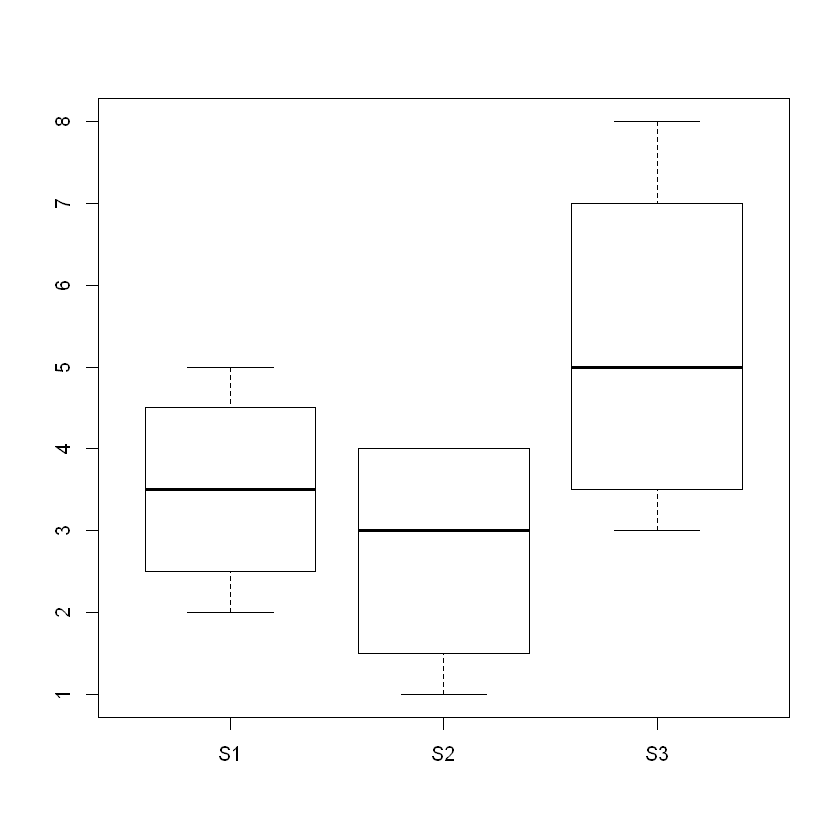

In [69]:
# 데이터 만들기
mat = matrix(c(5, 2, 3, 4, 4, 1, 4, 2, 3, 4, 6, 8), ncol = 3)
colnames(mat) = paste0("S", c(1:3))
rownames(mat) = paste0("gene", c(1:4))

# 확인
mat
boxplot(mat) # S1, S2, S3가 중구난방으로 흩어져있음 normalization 시켜줘야함

,S1,S2,S3
gene1,5.666667,5.166667,2.000000
gene2,2.000000,2.000000,3.000000
gene3,3.000000,5.166667,4.666667
gene4,4.666667,3.000000,5.666667


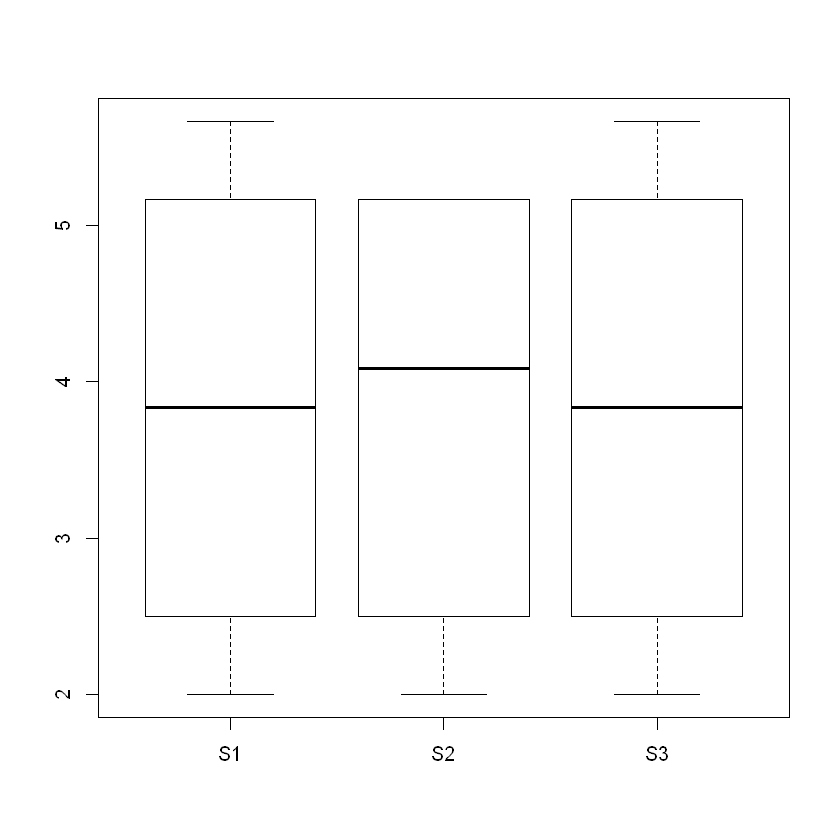

In [74]:
# normalize
quan.mat = normalize.quantiles(mat)
colnames(quan.mat) = colnames(mat)
rownames(quan.mat) = rownames(mat)

# 확인
quan.mat
boxplot(quan.mat) # 값의 보정이 된것을 볼 수 있음

#### scaling and centering (mean = 0 & sd = 1)
    모든 데이터를 균일화하게 만들 경우에 사용
    Scaling : 데이터 집합의 전체 표준편차(sd : 1)
    Centering : 데이터 집합의 평균(mean : 0)

,S1,S2,S3
gene1,1.1618950,0.8333333,-1.0147221
gene2,-1.1618950,-1.1666667,-0.5637345
gene3,-0.3872983,0.8333333,0.3382407
gene4,0.3872983,-0.5000000,1.2402159


[1] 0

[1] 1

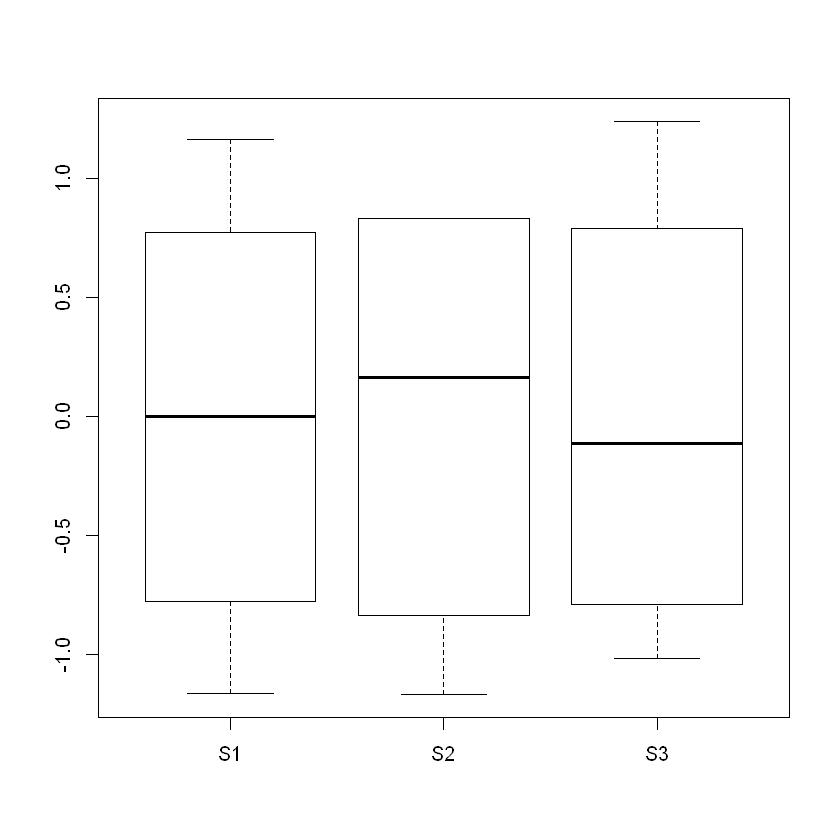

In [79]:
# scaling & centering
scale.mat = scale(mat)
scale.mat
boxplot(scale.mat)

# mean과 sd의 값 확인하기
mean(scale.mat[,3])
sd(scale.mat[,3])

[1] 200  50

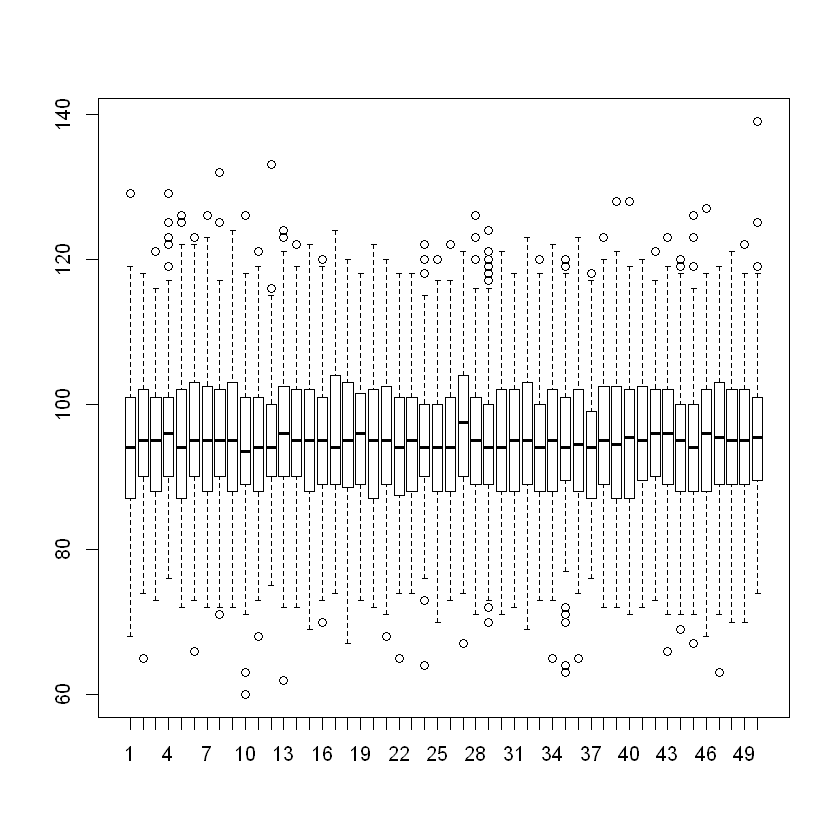

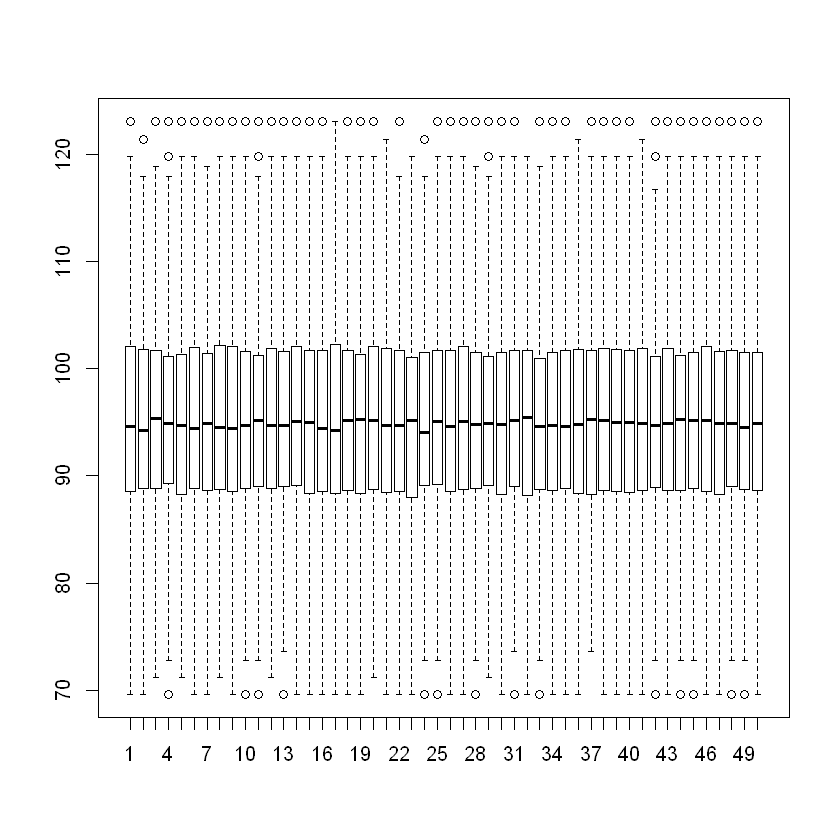

In [83]:
# example
exe = matrix(rpois(10000, rgamma(1.5, 90)), ncol = 50)
dim(exe)
boxplot(exe)

quan.exe = normalize.quantiles(exe)
boxplot(quan.exe)

#### log2 transformtion
    RNA-SEQ data 에서 주로 사용
    log2(fpkm+1)
    
    * 왜 RNA-SEQ data인가?
    RNA-SEQ는 hist를 그리면 대부분 왼쪽으로 치우져져있게 되는데, 
    통계를 적용하기위해서는 모든 데이터는 normal distribution을 따른다는 가정하에 적용하게 된다
    그렇기에 log2 transformation 사용하여 정규분포를 이루게함

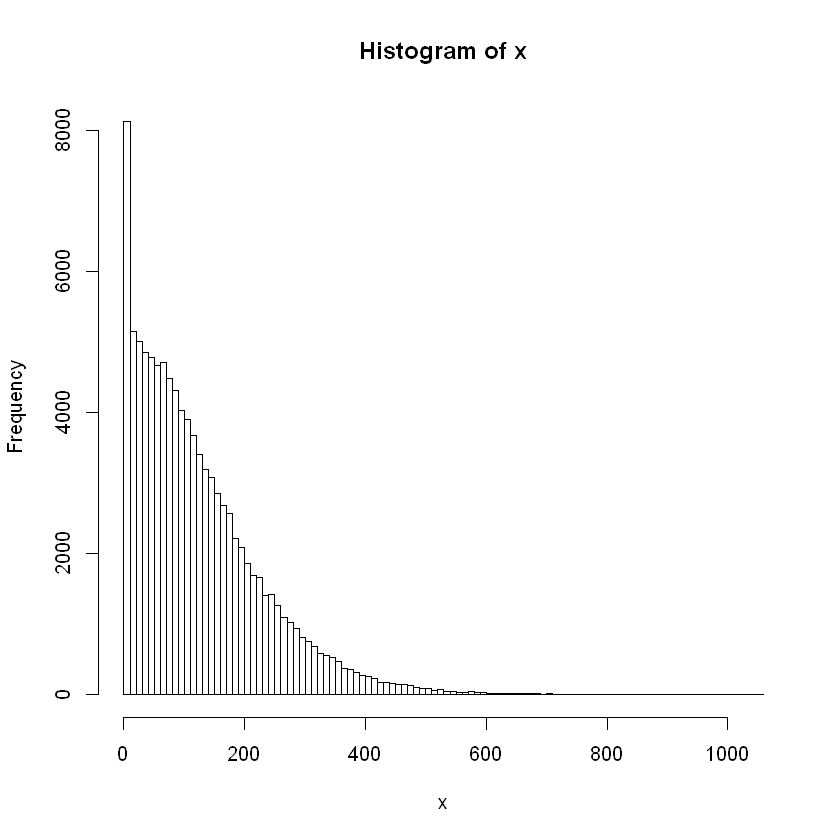

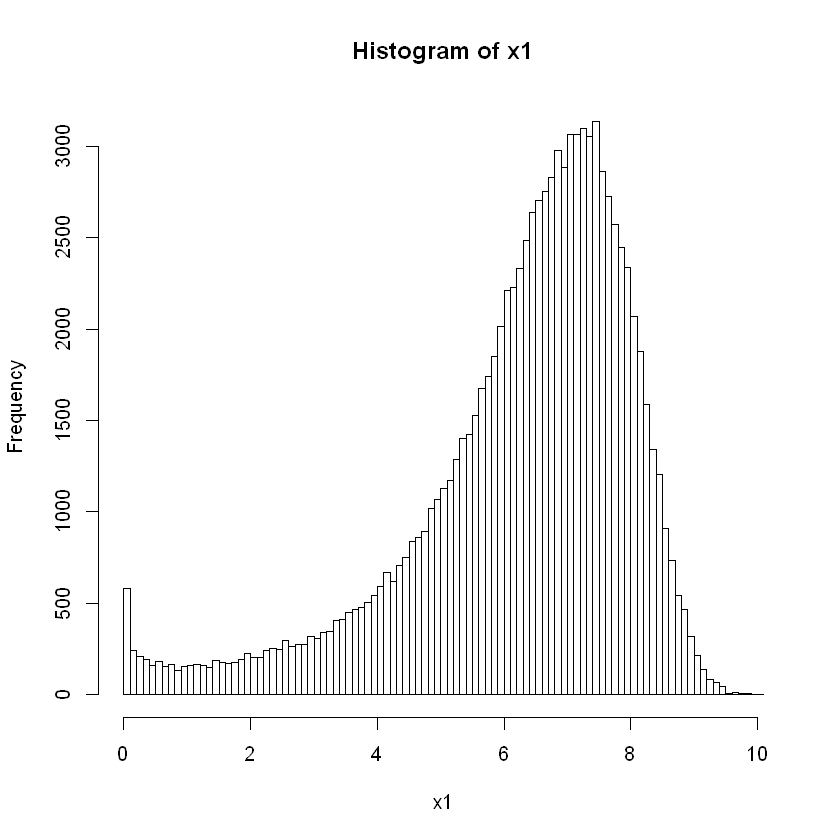

In [86]:
# 왼쪽으로 치우쳐져 있는 데이터
x = rnorm(100000, 10, 5)^2
hist(x, breaks = 100)

# log2 시켜서 정규분포 형태 만들기
x1 = log2(x+1)
hist(x1, breaks = 100)